## Problem 1

a) Load CIFAR10 dataset

In [1]:
import numpy as np
import torch
from torchvision import transforms , datasets
trainset = datasets.CIFAR10(root='./data', train=True,
download=True, transform=transforms.ToTensor())
testset = datasets.CIFAR10(root='./data', train=False, download=True,
transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


b) Visualize at least one image for each class. You may need to look into how dataset is implemented in PyTorch.


In [2]:
labels = list(set(trainset.targets))
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
trainset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


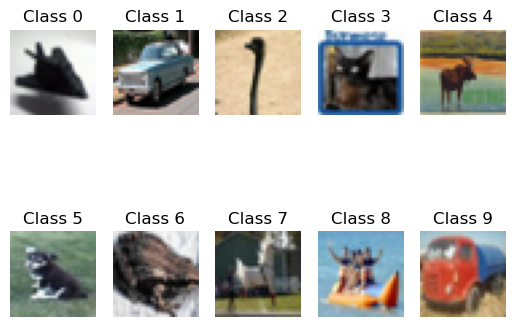

In [3]:
import matplotlib.pyplot as plt

i, j = 0, 0
while j < 10 and i < len(trainset.targets):
  plt.subplot(2, 5, j + 1)
  if trainset.targets[i] == labels[j]:
    plt.imshow(trainset.data[i])
    plt.title("Class {}".format(labels[j]))
    plt.axis('off')
    j += 1 
  i += 1
plt.show()

c) Split the trainset into training set and validation set with 90% : 10% ratio. Implement dataloaders for CIFAR10.

In [4]:
from torch.utils.data import Subset

def split_train_val(trainset):
  num = len(trainset)
  num_val = int(num*0.1)
  avail_idx = [i for i in range(0,num)]
  val_idx = []

  for i in range(num_val):
    idx = int(torch.rand(1)*len(avail_idx))
    # Add selected data to the validation set
    temp = avail_idx[idx]
    val_idx.append(temp)
    avail_idx.pop(idx) 

  # pass the idx to the Subset
  train_set = Subset(trainset, avail_idx)
  val_set = Subset(trainset, val_idx)

  return train_set, val_set

train_set, val_set = split_train_val(trainset)

print(f"Training Set Size: {len(train_set)}")
print(f"Validation Set Size: {len(val_set)}")

Training Set Size: 45000
Validation Set Size: 5000


In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=True)

d) Choose any two clases and implement a linear SVM model for binary classification.

In [6]:
# Create the SVM Model
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# can not have more than 1 layer
class SVM(nn.Module):
  def __init__(self, input_dim, num_classes):
    super(SVM, self).__init__()
    self.layer1 = nn.Linear(input_dim, num_classes)

  def forward(self, x):

    x = torch.flatten(x, start_dim=1)
    x = self.layer1(x)

    return x
model = SVM(32*32*3, num_classes=1)
model = model.to(device)
print(model)

SVM(
  (layer1): Linear(in_features=3072, out_features=1, bias=True)
)


In [7]:
# Create Optimizer: SGD
from torch.optim import SGD

def optimizer(model, lr):
  return SGD(model.parameters(), lr)


In [8]:
# Filter the dataset to include class 0 and 1 only
def filter_0_1(dataset):
  # Get indices where labels are 0 or 1
  idx = []
  for i in range(len(dataset)):
    x, label = dataset[i]
    if label in [0, 1]:
      idx.append(i)

  # Create filtered dataset
  filtered = Subset(dataset, idx)
  return DataLoader(filtered, batch_size=64, shuffle=True)

# First filter the datasets
train_set = filter_0_1(train_set)
val_set = filter_0_1(val_set)
testset = filter_0_1(testset)

In [9]:
# Create Loss Function: Hinge Loss
# Create accuracy function

def loss_hinge(y_pred, y_true, gamma, model):
  # if y_true is 0, convert to -1
  # if y_true is 1, convert to 1
  y_true = 2 * y_true.float() - 1
  # Ensure dimensions match
  y_true = y_true.unsqueeze(1)
  
  correct = correct_pred(y_pred, y_true)
  losses = torch.max(torch.zeros(y_pred.shape), 1 - y_pred * y_true)
  losses += gamma * torch.sum(model.layer1.weight ** 2)
  
  return losses.mean(), correct

# Counts the number of correct predictions
def correct_pred(y_pred, y_true):
  conv_pred = []
  correct = 0
  for i in range(len(y_pred)):
    if y_pred[i] > 0:
      conv_pred.append(1)
    else:
      conv_pred.append(-1)
  y_true = list(y_true)
  for i in range(len(y_true)):
    if y_true[i] == conv_pred[i]:
      correct += 1
        
  return correct

In [10]:
# Train the model
def train_loop(dataloader, model, gamma, lr):
  size = len(dataloader.dataset)
  total_loss = 0
  total_correct = 0
  
  # Define the optimizer
  optim = optimizer(model, lr)
    
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
        
    pred = model(X)
    loss, correct = loss_hinge(pred, y, gamma, model)

    optim.zero_grad()
    loss.backward()
    optim.step()
    
    total_loss += loss.item() * X.size(0)
    total_correct += correct
  print(f"Training loss: {total_loss / size}")
  print(f"Training accuracy: {total_correct / size}")
  return total_correct / size
  
# Test the model
def test_loop(dataloader, model, gamma):
  size = len(dataloader.dataset)

  model.eval()
  total_loss = 0
  total_correct = 0
    
  with torch.no_grad():
    for batch_idx, (X, y) in enumerate(dataloader):
      X = X.to(device)
      y = y.to(device)
      pred = model(X)
      loss, correct = loss_hinge(pred, y, gamma, model)

      total_loss += loss.item() * X.size(0)
      total_correct += correct
      
  print(f"Test loss: {total_loss / size}")
  print(f"Test accuracy: {total_correct / size}")
  return total_correct / size


e) Train for 10 epochs with batch size 64.

In [14]:
# Train for 10 epochs
for epoch in range(10):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train_acc = train_loop(train_set, model, gamma=0.01, lr = 0.0001)
  test_acc = test_loop(testset, model, gamma=0.01)


Epoch 1
-------------------------------
Training loss: 0.9502927305169139
Training accuracy: 0.4984887495802082
Test loss: 0.9193738679885864
Test accuracy: 0.5005
Epoch 2
-------------------------------
Training loss: 0.915363898572737
Training accuracy: 0.49938430538452927
Test loss: 0.8883646993637085
Test accuracy: 0.5015
Epoch 3
-------------------------------
Training loss: 0.8871518860708809
Training accuracy: 0.5024068062241128
Test loss: 0.8605524883270264
Test accuracy: 0.5125
Epoch 4
-------------------------------
Training loss: 0.8606322360014736
Training accuracy: 0.5174073659464905
Test loss: 0.8335201873779297
Test accuracy: 0.532
Epoch 5
-------------------------------
Training loss: 0.835769588731377
Training accuracy: 0.5485279301466472
Test loss: 0.8086364259719848
Test accuracy: 0.565
Epoch 6
-------------------------------
Training loss: 0.8118459351930455
Training accuracy: 0.5868129407813725
Test loss: 0.78656804895401
Test accuracy: 0.6415
Epoch 7
-------------

f) Perform data normalization 

In [18]:
# create Tensor to store mean and std
mean = torch.zeros(3)
std = torch.zeros(3)

# Calculate mean and std across all training images
# index 0: red, 1: green, 2: blue
# 4th dimension is the channel
for i in range(3):
  mean[i] = trainset.data[:, :, :, i].mean()
  std[i] = trainset.data[:, :, :, i].std()

# divide by 255 to scale to [0,1]
print('Mean:', mean/255)
print('Std:', std/255)

Mean: tensor([0.4914, 0.4822, 0.4465])
Std: tensor([0.2470, 0.2435, 0.2616])


In [11]:
# Create transform for Normalization
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))
])

# Apply transform to the dataset and re-do the steps for data loading
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_set, val_set = split_train_val(trainset)

train_set = filter_0_1(train_set)
val_set = filter_0_1(val_set)
testset = filter_0_1(testset)

Files already downloaded and verified
Files already downloaded and verified


g) train for 10 epochs after data normalization

In [15]:
# train for 10 epochs
model_norm = SVM(32*32*3, num_classes=1)
model_norm = model_norm.to(device)
for epoch in range(10):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train_acc = train_loop(train_set, model_norm, gamma=0.01, lr = 0.0001)
  test_acc = test_loop(testset, model_norm, gamma=0.01)


Epoch 1
-------------------------------
Training loss: 0.7341207106465417
Training accuracy: 0.6756545961002786
Test loss: 0.6010925483703613
Test accuracy: 0.753
Epoch 2
-------------------------------
Training loss: 0.5826823095724111
Training accuracy: 0.757883008356546
Test loss: 0.5477042317390441
Test accuracy: 0.776
Epoch 3
-------------------------------
Training loss: 0.5472363972132585
Training accuracy: 0.7716991643454039
Test loss: 0.5262213597297668
Test accuracy: 0.7815
Epoch 4
-------------------------------
Training loss: 0.5290339574906819
Training accuracy: 0.7786072423398329
Test loss: 0.5123192462921142
Test accuracy: 0.7825
Epoch 5
-------------------------------
Training loss: 0.5169282875154012
Training accuracy: 0.7844011142061281
Test loss: 0.5025943906307221
Test accuracy: 0.791
Epoch 6
-------------------------------
Training loss: 0.5076101459301282
Training accuracy: 0.787966573816156
Test loss: 0.49486645340919494
Test accuracy: 0.7995
Epoch 7
------------

h) hyperparameter tuning: gamma, learning rate

In [409]:
result_li = []
for gamma in range(1, 10, 1):
  for lr in range(1, 10, 1):
    # reset the model
    model_hypertune = SVM(32*32*3, num_classes=1)
    model_hypertune = model_hypertune.to(device)
    for epoch in range(10):
      print(f"Epoch {epoch+1}, lr: {lr/1000}, gamma: {gamma/100}\n-------------------------------")
      train_acc = train_loop(train_set, model_hypertune, float(gamma/100), float(lr/1000))
      val_acc = test_loop(val_set, model_hypertune, float(gamma/100))
      
      if epoch == 9:
        result_li.append((train_acc, val_acc, lr/1000, gamma/100))

result_li = sorted(result_li, key=lambda x: (x[1], x[0]), reverse=True)
print(result_li[0])

Epoch 1, lr: 0.001, gamma: 0.01
-------------------------------
Training loss: 0.5466857616539827
Training accuracy: 0.7695134172141187
Test loss: 0.5443476135527187
Test accuracy: 0.76153091265947
Epoch 2, lr: 0.001, gamma: 0.01
-------------------------------
Training loss: 0.4719552381849544
Training accuracy: 0.8083732323794678
Test loss: 0.5231851118528106
Test accuracy: 0.7684003925417076
Epoch 3, lr: 0.001, gamma: 0.01
-------------------------------
Training loss: 0.455566577265754
Training accuracy: 0.8159447722970716
Test loss: 0.5027584929578555
Test accuracy: 0.78900883218842
Epoch 4, lr: 0.001, gamma: 0.01
-------------------------------
Training loss: 0.4460603509962313
Training accuracy: 0.8182830419775081
Test loss: 0.5011880134869371
Test accuracy: 0.7821393523061825
Epoch 5, lr: 0.001, gamma: 0.01
-------------------------------
Training loss: 0.4372372500031818
Training accuracy: 0.8214007348847567
Test loss: 0.5016560639319639
Test accuracy: 0.7939156035328754
Epoch

j) final test accuracy


In [17]:
final_model_binary_SVM = SVM(32*32*3, num_classes=1)
final_model_binary_SVM = final_model_binary_SVM.to(device)

for epoch in range(10):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train_acc = train_loop(train_set, final_model_binary_SVM, gamma=0.07, lr = 0.002)
  test_acc = test_loop(testset, final_model_binary_SVM, gamma=0.01)

Epoch 1
-------------------------------
Training loss: 0.5372375277224357
Training accuracy: 0.7852924791086351
Test loss: 0.4605483832359314
Test accuracy: 0.813
Epoch 2
-------------------------------
Training loss: 0.48283420436229546
Training accuracy: 0.8101392757660167
Test loss: 0.43905397891998293
Test accuracy: 0.825
Epoch 3
-------------------------------
Training loss: 0.46888236003665873
Training accuracy: 0.8147075208913649
Test loss: 0.4639766826629639
Test accuracy: 0.8065
Epoch 4
-------------------------------
Training loss: 0.4586989210575072
Training accuracy: 0.8187186629526463
Test loss: 0.4346914262771606
Test accuracy: 0.8205
Epoch 5
-------------------------------
Training loss: 0.45378209390348045
Training accuracy: 0.8229526462395543
Test loss: 0.42124662244319916
Test accuracy: 0.829
Epoch 6
-------------------------------
Training loss: 0.45118903174373765
Training accuracy: 0.8271866295264624
Test loss: 0.44221025657653806
Test accuracy: 0.8155
Epoch 7
----

## Problem 2

a) Perform multiclass classification using multiple one vs all soft margin SVM.

In [118]:
# Re-load the dataset and Normalize
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_set, val_set = split_train_val(trainset)
print("Train set size: ", len(train_set))
print("Validation set size: ", len(val_set))
print("Test set size: ", len(testset))

Files already downloaded and verified
Files already downloaded and verified
Train set size:  45000
Validation set size:  5000
Test set size:  10000


In [119]:
train_set = DataLoader(train_set, batch_size=64, shuffle=True, drop_last=True)
val_set = DataLoader(val_set, batch_size=64, shuffle=True, drop_last=True)
testset = DataLoader(testset, batch_size=64, shuffle=True, drop_last=True)


In [97]:
def loss_hinge_Multi_SVM(y_pred, y_true, gamma, model, class_num):
  # if y_true is i, convert to 1
  # else convert to -1
  y_gt = torch.where(y_true == class_num, 1, -1)
  # Ensure dimensions match
  y_gt = y_gt.unsqueeze(1)
  # Calculate hinge loss for each sample
  res = torch.where(y_pred > 0, 1, -1)
  correct = correct_pred(res, y_gt)
  losses = torch.max(torch.zeros(y_pred.shape), 1 - y_pred * y_gt)
  losses += gamma * torch.sum(model.layer1.weight ** 2)
  
  return losses.mean(), correct, res


In [175]:
# Train the model
def train_loop_Multi_SVM(dataloader, model, gamma, lr, class_num):
  size = len(dataloader.dataset)
  total_loss = 0
  total_correct = 0
  train_tens = torch.zeros((len(dataloader.dataset), 1))

  optim = optimizer(model, lr)
  
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    
    pred = model(X)
    loss, correct, res = loss_hinge_Multi_SVM(pred, y, gamma, model, class_num)

    optim.zero_grad()
    loss.backward()
    optim.step()
  
    total_loss += loss.item() * X.size(0)
    total_correct += correct

    for i in range(len(res)):
      sample_idx = batch * dataloader.batch_size + i
      train_tens[sample_idx] = res[i]
    
  print(f"Training loss: {total_loss / size}")
  #print(f"Training accuracy: {total_correct / size}")
  return pred, total_correct, total_loss, train_tens

# Test the model
def test_loop_Multi_SVM(dataloader, models, train_tens, gamma):
  size = len(dataloader.dataset)
  total_correct = 0
  result_tens = torch.zeros((len(dataloader.dataset), 9))  # 2D tensor for storing predictions across classes

  for class_num in range(9): 
    model_ = models[class_num]
    model_.eval()
    total_loss = 0
    
    with torch.no_grad():
      for batch_idx, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        
        y_gt = torch.where(y == class_num, 1, -1).to(device)
        
        pred = model_(X)
        loss, correct, res = loss_hinge_Multi_SVM(pred, y_gt, gamma, model_, class_num)
        total_loss += loss.item() * X.size(0)
        
        for i in range(len(res)):
          sample_idx = batch_idx * dataloader.batch_size + i
          result_tens[sample_idx, class_num] = res[i]

    print(f"Test loss for class {class_num}: {total_loss / size}")

  # accuracy calculation
  for i in range(len(result_tens)): 
    res_ = result_tens[i]
    if (res_ == -1).all() or ((res_ == 1).sum() == 1 and (res_ == -1).sum() == len(res_) - 1):
      if train_tens[i] == 1:
        total_correct += 1

  #print("Result Tensor:", result_tens) 
  return total_correct, result_tens



In [180]:
models = []
for i in range(9):
    model_multi = SVM(32*32*3, num_classes=1).to(device)
    models.append(model_multi)

total_correct = 0
result_tens = None
train_tens = None

for epoch in range(9):
    print(f" Epoch {epoch+1}\n-------------------------------")
    
    for class_num in range(9):
        print(f"Training classifier for Class {class_num}")
        train_pred, train_correct, train_loss, train_tens = train_loop_Multi_SVM(train_set, models[class_num], gamma=0.01, lr=0.0001, class_num=class_num)
    
    total_correct, result_tens = test_loop_Multi_SVM(testset, models, train_tens, gamma=0.01)
    accuracy = total_correct / len(testset.dataset)
    print(f"Overall Accuracy after Epoch {epoch+1}: {accuracy:.2f}")

print(f"Final Total accuracy: {total_correct / len(testset.dataset):.2f}")

 Epoch 1
-------------------------------
Training classifier for Class 0
Training loss: 0.7332859108395047
Training classifier for Class 1
Training loss: 0.8067486012352837
Training classifier for Class 2
Training loss: 0.7651013175116645
Training classifier for Class 3
Training loss: 0.7409722497728136
Training classifier for Class 4
Training loss: 0.783869953918457
Training classifier for Class 5
Training loss: 0.7107228898366292
Training classifier for Class 6
Training loss: 0.7515205088297526
Training classifier for Class 7
Training loss: 0.7858535222371419
Training classifier for Class 8
Training loss: 0.7468806915283203
Test loss for class 0: 0.6889760694503784
Test loss for class 1: 0.7084241714477539
Test loss for class 2: 0.6721014846801758
Test loss for class 3: 0.6460918907165527
Test loss for class 4: 0.6859098178863525
Test loss for class 5: 0.6614056589126587
Test loss for class 6: 0.6716500057220459
Test loss for class 7: 0.6656892684936524
Test loss for class 8: 0.72240

In [174]:
# result after running 1 epoch
total_correct = 0
for i in range(len(result_tens)):
  if (result_tens[i] == -1).all() or ((result_tens[i] == 1).sum() == 1 and (result_tens[i] == -1).sum() == len(result_tens[i]) - 1):
    if train_tens[i] == 1:
      print(result_tens[i], i)
      total_correct += 1

print(f"Final Total accuracy: {total_correct / len(testset.dataset):.2f}")


tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1.]) 71
tensor([-1., -1., -1.,  1., -1., -1., -1., -1., -1.]) 95
tensor([-1., -1., -1.,  1., -1., -1., -1., -1., -1.]) 112
tensor([-1., -1., -1., -1., -1., -1., -1.,  1., -1.]) 129
tensor([-1.,  1., -1., -1., -1., -1., -1., -1., -1.]) 141
tensor([-1., -1.,  1., -1., -1., -1., -1., -1., -1.]) 143
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1.]) 155
tensor([-1., -1., -1., -1., -1.,  1., -1., -1., -1.]) 158
tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1.]) 160
tensor([-1., -1., -1., -1.,  1., -1., -1., -1., -1.]) 170
tensor([-1., -1., -1., -1., -1., -1., -1.,  1., -1.]) 185
tensor([-1., -1., -1., -1.,  1., -1., -1., -1., -1.]) 209
tensor([-1., -1., -1., -1., -1., -1., -1.,  1., -1.]) 220
tensor([-1., -1., -1., -1., -1., -1.,  1., -1., -1.]) 221
tensor([-1., -1.,  1., -1., -1., -1., -1., -1., -1.]) 233
tensor([-1., -1., -1., -1., -1., -1.,  1., -1., -1.]) 250
tensor([-1., -1., -1., -1.,  1., -1., -1., -1., -1.]) 261
tensor([-1., -1.

b) Perform hyperparamter tuning for the multiclass SVM

In [182]:
# Without too much printing out the results

# Train the model
def train_loop_Multi_SVM(dataloader, model, gamma, lr, class_num):
  size = len(dataloader.dataset)
  total_loss = 0
  total_correct = 0
  train_tens = torch.zeros((len(dataloader.dataset), 1))

  optim = optimizer(model, lr)
  
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    
    pred = model(X)
    loss, correct, res = loss_hinge_Multi_SVM(pred, y, gamma, model, class_num)

    optim.zero_grad()
    loss.backward()
    optim.step()
  
    total_loss += loss.item() * X.size(0)
    total_correct += correct

    for i in range(len(res)):
      sample_idx = batch * dataloader.batch_size + i
      train_tens[sample_idx] = res[i]
    
  #print(f"Training loss: {total_loss / size}")
  #print(f"Training accuracy: {total_correct / size}")
  return pred, total_correct, total_loss, train_tens

# Test the model
def test_loop_Multi_SVM(dataloader, models, train_tens, gamma):
  size = len(dataloader.dataset)
  total_correct = 0
  result_tens = torch.zeros((len(dataloader.dataset), 9))  # 2D tensor for storing predictions across classes

  for class_num in range(9): 
    model_ = models[class_num]
    model_.eval()
    total_loss = 0
    
    with torch.no_grad():
      for batch_idx, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        
        y_gt = torch.where(y == class_num, 1, -1).to(device)
        
        pred = model_(X)
        loss, correct, res = loss_hinge_Multi_SVM(pred, y_gt, gamma, model_, class_num)
        total_loss += loss.item() * X.size(0)
        
        for i in range(len(res)):
          sample_idx = batch_idx * dataloader.batch_size + i
          result_tens[sample_idx, class_num] = res[i]

    #print(f"Test loss for class {class_num}: {total_loss / size}")

  for i in range(len(result_tens)): 
    res_ = result_tens[i]
    if (res_ == -1).all() or ((res_ == 1).sum() == 1 and (res_ == -1).sum() == len(res_) - 1):
      if train_tens[i] == 1:
        total_correct += 1

  #print("Result Tensor:", result_tens) 
  return total_correct, result_tens


In [187]:
total_correct = 0
result_tens = None
train_tens = None
accuracy = 0

gamma_values = [0.001, 0.003, 0.01, 0.03, 0.1]
lr_values = [0.0001, 0.0003, 0.001, 0.003, 0.01]

result = []

for gamma in gamma_values:
  for lr in lr_values:
    print(f"\n-----------------------------------")
    print(f"Testing gamma={gamma}, lr={lr}")
    
    models = []
    for i in range(9):
      model_multi = SVM(32*32*3, num_classes=1).to(device)
      models.append(model_multi)
    
    for epoch in range(9):
      
      
      for class_num in range(9):
        #print(f"Training classifier for Class {class_num}")
        train_pred, train_correct, train_loss, train_tens = train_loop_Multi_SVM(train_set, models[class_num], gamma=gamma, lr=lr, class_num=class_num)
      
      total_correct, result_tens = test_loop_Multi_SVM(val_set, models, train_tens, gamma=gamma)
      if epoch == 8:
        accuracy = total_correct / len(val_set.dataset)
        print(f"Overall Accuracy after Epoch {epoch+1}: {accuracy:.2f}")
      
    result.append((accuracy, gamma, lr))

result = sorted(result, key=lambda x: (x[0], x[1], x[2]), reverse=True)
print(result[0])


-----------------------------------
Testing gamma=0.001, lr=0.0001
Overall Accuracy after Epoch 9: 0.11

-----------------------------------
Testing gamma=0.001, lr=0.0003
Overall Accuracy after Epoch 9: 0.02

-----------------------------------
Testing gamma=0.001, lr=0.001
Overall Accuracy after Epoch 9: 0.00

-----------------------------------
Testing gamma=0.001, lr=0.003
Overall Accuracy after Epoch 9: 0.01

-----------------------------------
Testing gamma=0.001, lr=0.01
Overall Accuracy after Epoch 9: 0.04

-----------------------------------
Testing gamma=0.003, lr=0.0001
Overall Accuracy after Epoch 9: 0.10

-----------------------------------
Testing gamma=0.003, lr=0.0003
Overall Accuracy after Epoch 9: 0.03

-----------------------------------
Testing gamma=0.003, lr=0.001
Overall Accuracy after Epoch 9: 0.00

-----------------------------------
Testing gamma=0.003, lr=0.003
Overall Accuracy after Epoch 9: 0.01

-----------------------------------
Testing gamma=0.003, lr=

In [190]:
models = []
for i in range(9):
    model_multi = SVM(32*32*3, num_classes=1).to(device)
    models.append(model_multi)

total_correct = 0
result_tens = None
train_tens = None

for epoch in range(9):
    #print(f" Epoch {epoch+1}\n-------------------------------")
    
    for class_num in range(9):
        #print(f"Training classifier for Class {class_num}")
        train_pred, train_correct, train_loss, train_tens = train_loop_Multi_SVM(train_set, models[class_num], gamma=0.1, lr=0.0001, class_num=class_num)
    
    total_correct, result_tens = test_loop_Multi_SVM(testset, models, train_tens, gamma=0.01)
    accuracy = total_correct / len(testset.dataset)
    print(f"Overall Accuracy after Epoch {epoch+1}: {accuracy:.2f}")

print(f"Final Total accuracy: {total_correct / len(testset.dataset):.2f}")

Overall Accuracy after Epoch 1: 0.09
Overall Accuracy after Epoch 2: 0.08
Overall Accuracy after Epoch 3: 0.10
Overall Accuracy after Epoch 4: 0.10
Overall Accuracy after Epoch 5: 0.10
Overall Accuracy after Epoch 6: 0.11
Overall Accuracy after Epoch 7: 0.11
Overall Accuracy after Epoch 8: 0.12
Overall Accuracy after Epoch 9: 0.12
Final Total accuracy: 0.12


## Problem 3

a) Implement your own multinomial / multi class logistic regression from scratch. 

In [191]:
# Re-load the dataset and Normalize
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_set, val_set = split_train_val(trainset)
print("Train set size: ", len(train_set))
print("Validation set size: ", len(val_set))
print("Test set size: ", len(testset))

Files already downloaded and verified
Files already downloaded and verified
Train set size:  45000
Validation set size:  5000
Test set size:  10000


In [192]:
train_set = DataLoader(train_set, batch_size=64, shuffle=True)
val_set = DataLoader(val_set, batch_size=64, shuffle=True)
testset = DataLoader(testset, batch_size=64, shuffle=True)

In [317]:
class Logistic_Reg(nn.Module):
  def __init__(self, input_dim):
    super(Logistic_Reg, self).__init__()
    self.weights = torch.randn(input_dim, 10, requires_grad=True)*0.0001
    self.bias = torch.zeros(10, requires_grad=True)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = x @ self.weights + self.bias
    return x
Logistic_model = Logistic_Reg(32*32*3)
Logistic_model = Logistic_model.to(device)
print(Logistic_model)

Logistic_Reg()


In [318]:
# optimizer
from torch.optim import Adam
def optimizer_logistic(Logistic_model, lr):
    Logistic_model.weights = nn.Parameter(Logistic_model.weights)
    Logistic_model.bias = nn.Parameter(Logistic_model.bias)
    return Adam(Logistic_model.parameters(), lr)

optim_logistic = optimizer_logistic(Logistic_model, lr=0.0001)

def CrossEntropy_Loss(y_pred, y_true, Logistic_model):
    y_true_converge = torch.zeros((len(y_true), 10))
    for i in range(len(y_true)):
      y_true_converge[i, y_true[i]] = 1

    exp = torch.exp(y_pred)
    sum = torch.sum(exp, dim=1, keepdim=True) 
    softmax = exp/sum
    log_softmax = torch.log(softmax)
    
    gt_label_softmax = torch.zeros(y_true.size())
    for i in range(len(y_true)):
        gt_label_softmax[i] = log_softmax[i, y_true[i]]
    
    loss = -(gt_label_softmax.mean() * y_true_converge.mean())

    return loss

In [307]:
# train the model

def train_loop_logistic(dataloader, Logistic_model, lr):
  size = len(dataloader.dataset)
  total_loss = 0
  total_correct = 0
  
  # Define the optimizer
  optim = optimizer_logistic(Logistic_model, lr)
    
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
        
    pred = Logistic_model(X)
    loss = CrossEntropy_Loss(pred, y, Logistic_model)

    optim.zero_grad()
    loss.backward()
    optim.step()
    
    total_loss += loss.item() * X.size(0)
    
    # Calculate accuracy
    predicted = torch.argmax(pred, dim=1)
    total_correct += (predicted == y).sum().item()
        
  print(f"Training loss: {total_loss / size}")
  print(f"Training accuracy: {total_correct / size}")
  return total_correct / size

# Test the model
def test_loop_logistic(dataloader, Logistic_model):
  size = len(dataloader.dataset)
  Logistic_model.eval()
  total_loss = 0
  total_correct = 0
    
  with torch.no_grad():
    for batch_idx, (X, y) in enumerate(dataloader):
      X = X.to(device)
      y = y.to(device)
      
      pred = Logistic_model(X)
      loss = CrossEntropy_Loss(pred, y, Logistic_model)

      total_loss += loss.item() * X.size(0)
      
      # Calculate accuracy
      predicted = torch.argmax(pred, dim=1)
      total_correct += (predicted == y).sum().item()
      
  print(f"Test loss: {total_loss / size}")
  print(f"Test accuracy: {total_correct / size}")
  return total_loss / size

b) Perform hyperparameter tuning for the multinomial logistic regression

In [320]:
# perform hyperparameter tuning
# using validation set
result_li = []

for lr in range(1, 10, 1):
  Logistic_model = Logistic_Reg(32*32*3)
  Logistic_model = Logistic_model.to(device)
  for epoch in range(10):
    print(f"Epoch {epoch+1}, lr: {lr/10000}\n-------------------------------")
    train_acc = train_loop_logistic(train_set, Logistic_model, lr=lr/10000)
    val_acc = test_loop_logistic(val_set, Logistic_model)
    if epoch == 9:
      result_li.append((train_acc, val_acc, lr/10000))

Epoch 1, lr: 0.0001
-------------------------------
Training loss: 1.8535472593095568
Training accuracy: 0.36233333333333334
Test loss: 1.7778145320892333
Test accuracy: 0.3958
Epoch 2, lr: 0.0001
-------------------------------
Training loss: 1.7720880311754015
Training accuracy: 0.3964666666666667
Test loss: 1.744803544998169
Test accuracy: 0.4118
Epoch 3, lr: 0.0001
-------------------------------
Training loss: 1.7451235362794664
Training accuracy: 0.4061111111111111
Test loss: 1.7461146120071411
Test accuracy: 0.4144
Epoch 4, lr: 0.0001
-------------------------------
Training loss: 1.7273397235446506
Training accuracy: 0.41357777777777777
Test loss: 1.7411558589935303
Test accuracy: 0.4092
Epoch 5, lr: 0.0001
-------------------------------
Training loss: 1.7180433121999106
Training accuracy: 0.41533333333333333
Test loss: 1.7278964265823364
Test accuracy: 0.4066
Epoch 6, lr: 0.0001
-------------------------------
Training loss: 1.7057093061023287
Training accuracy: 0.42106666666

In [321]:
# optimal hyperparameter
result_li = sorted(result_li, key=lambda x: (x[1], x[0]))
print(result_li[-1])

(0.3963111111111111, 2.0011804275512697, 0.0008)


c) What is the Final test accuracy?

In [319]:
# final test accuracy
Logistic_model = Logistic_Reg(32*32*3).to(device)

for epoch in range(10):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train_acc = train_loop_logistic(train_set, Logistic_model, lr=0.0008)
  test_acc = test_loop_logistic(testset, Logistic_model)


Epoch 1
-------------------------------
Training loss: 1.9396388982137045
Training accuracy: 0.3444888888888889
Test loss: 1.861122340965271
Test accuracy: 0.3748
Epoch 2
-------------------------------
Training loss: 1.8676819272359213
Training accuracy: 0.3696
Test loss: 1.9177850955963134
Test accuracy: 0.361
Epoch 3
-------------------------------
Training loss: 1.8443275566101074
Training accuracy: 0.3776
Test loss: 1.9133680473327637
Test accuracy: 0.3564
Epoch 4
-------------------------------
Training loss: 1.8311632316589355
Training accuracy: 0.38237777777777776
Test loss: 1.9192345781326294
Test accuracy: 0.3539
Epoch 5
-------------------------------
Training loss: 1.8199117468092176
Training accuracy: 0.3844222222222222
Test loss: 1.8916705570220946
Test accuracy: 0.3592
Epoch 6
-------------------------------
Training loss: 1.8142749859703913
Training accuracy: 0.3900222222222222
Test loss: 1.9053936965942382
Test accuracy: 0.3608
Epoch 7
-------------------------------
T

d) Compare against the model implemented using functions from PyTorch libraries

In [313]:
class Logistic_Reg_torch(nn.Module):
  def __init__(self, input_dim):
    super(Logistic_Reg_torch, self).__init__()
    self.layer1 = nn.Linear(input_dim, 10)

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.layer1(x)
    return x
  
Logistic_model_torch = Logistic_Reg_torch(32*32*3)
Logistic_model_torch = Logistic_model_torch.to(device)
print(Logistic_model_torch)

Logistic_Reg_torch(
  (layer1): Linear(in_features=3072, out_features=10, bias=True)
)


In [314]:
# optimizer
from torch.optim import Adam
def optimizer_logistic(model, lr):
    return Adam(model.parameters(), lr)

optim_logistic = optimizer_logistic(Logistic_model_torch, lr=0.0001)

def CrossEntropy_Loss_nn(y_pred, y_true):
    
    cross_entropy = nn.CrossEntropyLoss()
    
    loss_ = cross_entropy(y_pred, y_true)
    return loss_

In [315]:
# train the model

def train_loop_logistic(dataloader, Logistic_model, lr):
  size = len(dataloader.dataset)
  total_loss = 0
  total_correct = 0
  
  # Define the optimizer
  optim = optimizer_logistic(Logistic_model, lr)
    
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
        
    pred = Logistic_model(X)
    loss = CrossEntropy_Loss_nn(pred, y)

    optim.zero_grad()
    loss.backward()
    optim.step()
    
    total_loss += loss.item() * X.size(0)
    
    # Calculate accuracy
    predicted = torch.argmax(pred, dim=1)
    total_correct += (predicted == y).sum().item()
        
  print(f"Training loss: {total_loss / size}")
  print(f"Training accuracy: {total_correct / size}")
  return total_correct / size

# Test the model
def test_loop_logistic(dataloader, Logistic_model):
  size = len(dataloader.dataset)
  Logistic_model.eval()
  total_loss = 0
  total_correct = 0
    
  with torch.no_grad():
    for batch_idx, (X, y) in enumerate(dataloader):
      X = X.to(device)
      y = y.to(device)
      
      pred = Logistic_model(X)
      loss = CrossEntropy_Loss_nn(pred, y)

      total_loss += loss.item() * X.size(0)
      
      # Calculate accuracy
      predicted = torch.argmax(pred, dim=1)
      total_correct += (predicted == y).sum().item()
      
  print(f"Test loss: {total_loss / size}")
  print(f"Test accuracy: {total_correct / size}")
  return total_loss / size

In [316]:
# train for 10 epochs
for epoch in range(10):
  train_acc = train_loop_logistic(train_set, Logistic_model_torch, lr=0.0008)
  test_acc = test_loop_logistic(testset, Logistic_model_torch)


Training loss: 1.9419910084194607
Training accuracy: 0.3423777777777778
Test loss: 1.8593612155914307
Test accuracy: 0.3619
Training loss: 1.8765240019480387
Training accuracy: 0.36715555555555557
Test loss: 1.8494980865478516
Test accuracy: 0.3693
Training loss: 1.8457430002848307
Training accuracy: 0.37822222222222224
Test loss: 1.8937924064636231
Test accuracy: 0.3593
Training loss: 1.8290804231855604
Training accuracy: 0.3838
Test loss: 1.951517528152466
Test accuracy: 0.3575
Training loss: 1.822738539144728
Training accuracy: 0.3852888888888889
Test loss: 1.8864539249420167
Test accuracy: 0.363
Training loss: 1.8122870926327175
Training accuracy: 0.3872
Test loss: 1.8844112409591676
Test accuracy: 0.3631
Training loss: 1.8054323323991563
Training accuracy: 0.39393333333333336
Test loss: 1.8806983116149902
Test accuracy: 0.3614
Training loss: 1.8057830153571235
Training accuracy: 0.39435555555555557
Test loss: 1.9091109558105468
Test accuracy: 0.3684
Training loss: 1.80206692742241